# Actuarial Science in Medical Insurance and Policy Making

This notebook introduces **actuarial methods** used in health and medical insurance.  
We will link actuarial science with **health economics** and **policy decision-making**.

Main topics:
1. Risk pooling & premium calculation  
2. Loss distributions  
3. Life tables & survival modeling  
4. Reserves and solvency  
5. Risk-based pricing policies  
6. Policy simulations and sensitivity analysis

In [1]:
# Basic Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

Pure Premium per customer ≈ 387.33


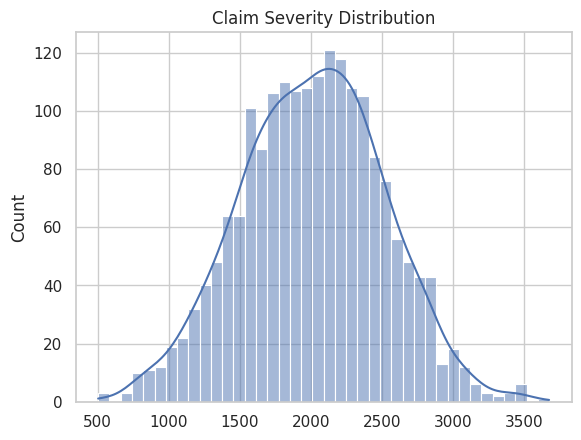

In [2]:
# Example: claim frequency & severity
n_customers = 10000
freq_rate = 0.2   # 20% chance of claim
sev_mu, sev_sigma = 2000, 500   # average 2000 cost, std=500

claims = np.random.binomial(1, freq_rate, n_customers) * np.random.normal(sev_mu, sev_sigma, n_customers)
premium = claims.mean()

print(f"Pure Premium per customer ≈ {premium:.2f}")
sns.histplot(claims[claims>0], bins=40, kde=True)
plt.title("Claim Severity Distribution")
plt.show()

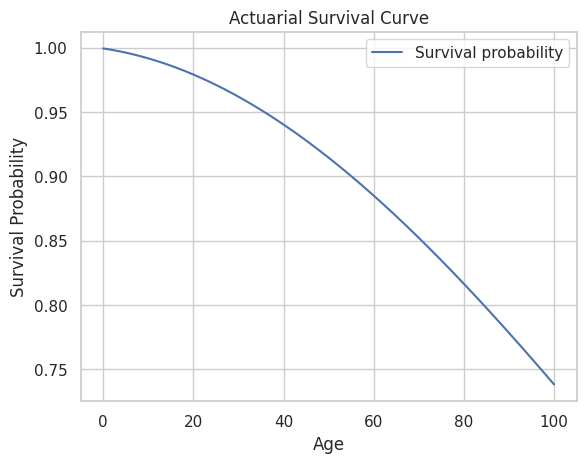

In [3]:
# Simplified survival curve
ages = np.arange(0, 101)
qx = 0.0005 + 0.00005 * ages  # mortality rate increasing with age
lx = np.cumprod(1 - qx)       # survival function

plt.plot(ages, lx, label="Survival probability")
plt.xlabel("Age")
plt.ylabel("Survival Probability")
plt.title("Actuarial Survival Curve")
plt.legend()
plt.show()

## Pure Premium and Loading

Premium = Expected Claims + Loading

- **Expected Claims** = Frequency × Severity
- **Loading** = administrative & risk margin

We model claim frequency with Poisson/Binomial, and severity with
Gamma/Lognormal distributions.

Pure Premium = 400.68
Loaded Gross Premium = 460.79


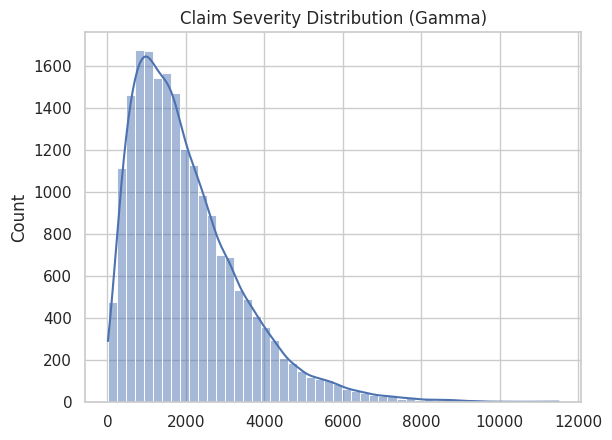

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

np.random.seed(123)

# Parameters
n_customers = 100_000
claim_frequency = 0.2
severity_alpha, severity_theta = 2, 1000   # Gamma distribution

# Simulating claims
freq = np.random.binomial(1, claim_frequency, n_customers)
severity = np.random.gamma(shape=severity_alpha, scale=severity_theta, size=n_customers)
claims = freq * severity

pure_premium = claims.mean()
loading = 0.15 * pure_premium
gross_premium = pure_premium + loading

print(f"Pure Premium = {pure_premium:.2f}")
print(f"Loaded Gross Premium = {gross_premium:.2f}")

sns.histplot(claims[claims>0], bins=50, kde=True)
plt.title("Claim Severity Distribution (Gamma)")
plt.show()

## Life Tables

Actuaries model survival \( l_x \):

\[
l_x = l_0 \prod_{i=0}^{x}(1 - q_i)
\]

- \( q_x \) = mortality at age x.  
- Useful for life insurance, health insurance reserves, and predicting long‑term cost.

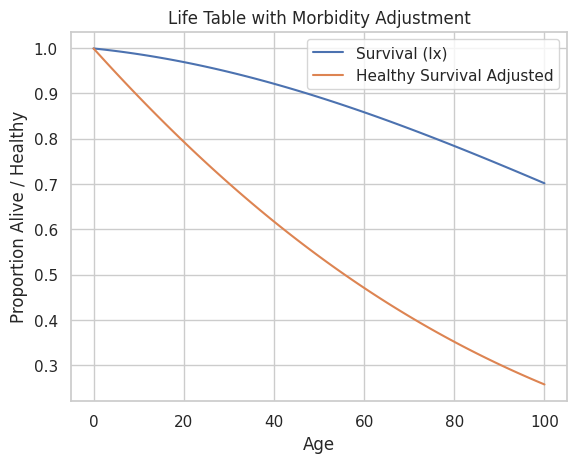

In [5]:
ages = np.arange(0, 101)
qx = 0.001 + 0.00005 * ages  # increasing mortality with age
lx = np.cumprod(1 - qx)      # proportion surviving

# Health-adjusted survival (adds morbidity)
morbidity_factor = np.exp(-0.01 * ages)   # quality of life decline with age
hx = lx * morbidity_factor

plt.plot(ages, lx, label="Survival (lx)")
plt.plot(ages, hx, label="Healthy Survival Adjusted")
plt.xlabel("Age")
plt.ylabel("Proportion Alive / Healthy")
plt.title("Life Table with Morbidity Adjustment")
plt.legend()
plt.show()

## Reserves & Solvency

Reserve = Expected PV(Future Claims) – Expected PV(Future Premiums)

We discount future cash flows at an actuarial interest rate.
Stress tests: if claims ↑ by 20% or interest ↓, solvency margin shrinks.

In [6]:
discount_rate = 0.03
years = np.arange(1, 21)

# Assume fixed annual premium
annual_premium = gross_premium

# Expected claims = gradually rising with age
expected_claims = 200 + 5*years

# Present value factor
discount_factors = 1 / (1 + discount_rate)**years

pv_claims = np.sum(expected_claims * discount_factors)
pv_premiums = np.sum(annual_premium * discount_factors)

reserve = pv_claims - pv_premiums

print(f"PV Claims: {pv_claims:.2f}")
print(f"PV Premiums: {pv_premiums:.2f}")
print(f"Required Reserve: {reserve:.2f}")

# Stress test: 20% higher claims
reserve_stress = 1.2*pv_claims - pv_premiums
print(f"Reserve under stress: {reserve_stress:.2f}")

PV Claims: 3683.88
PV Premiums: 6855.35
Required Reserve: -3171.47
Reserve under stress: -2434.70


## Policy Design and Risk Sharing

Medical insurance policy modeling requires decisions on how to balance
**equity, sustainability, and solvency**. Some common approaches:

1. **Community Rating**  
   - Every insured pays the same premium, regardless of risk.  
   - Promotes equity, but risk of adverse selection.

2. **Risk Rating (Experience Rating)**  
   - Premiums vary by age, sex, or health risk.  
   - Improves solvency, but reduces affordability for high‑risk individuals.

3. **Subsidized Premiums**  
   - Government/tax funds offset premiums for high‑risk populations.  
   - Blends actuarial fairness with social policy goals.

4. **Universal Coverage / Risk Pooling**  
   - Everyone contributes → reduces volatility by pooling risks widely.  
   - Requires strong government planning & reserve margins.

---

We simulate and compare expected losses, premiums, and **policyholder equity** in three regimes:
- Community rating
- Risk rating
- Subsidized community rating

   age        claims   risk
0   58      0.000000  0.088
1   71  10856.539248  0.101
2   48      0.000000  0.078
3   34      0.000000  0.064
4   62      0.000000  0.092
Community premium: 314.12
Subsidized premium (40% govt subsidy): 188.47
Risk-rated premium sample:
 age
20    200.128722
21    155.135631
22    133.817031
23    222.008191
24    163.061769
Name: claims, dtype: float64


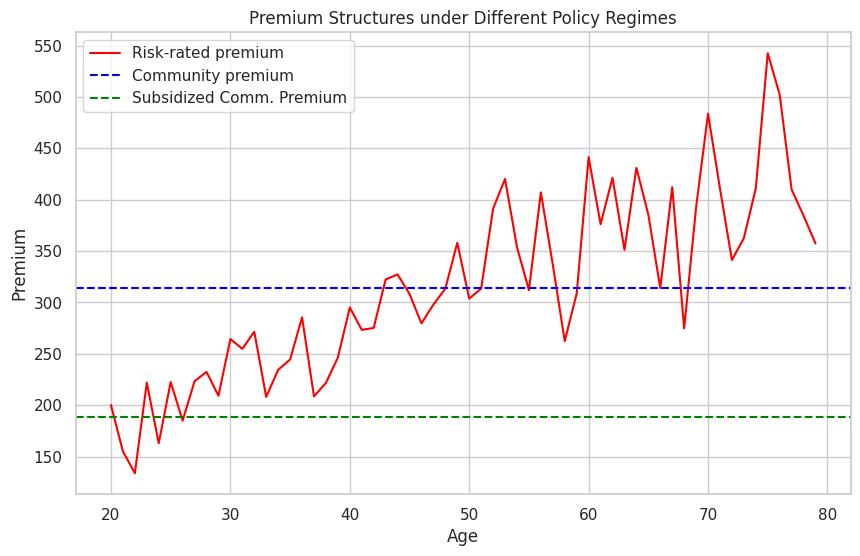

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

# --- Population simulation ---
n = 50_000
ages = np.random.randint(20, 80, n)

# Mortality/morbidity-based claim probability
base_rate = 0.05
claim_prob = base_rate + 0.001*(ages-20)   # older age => higher claim risk

# Severity ~ Gamma distribution (medical claims heavy-tailed)
alpha, theta = 2, 2000
severity = np.random.gamma(alpha, theta, n)

claims = np.random.binomial(1, claim_prob) * severity

df = pd.DataFrame({"age":ages, "claims":claims, "risk":claim_prob})
print(df.head())

# --- Policy Scenarios ---
def community_premium(data):
    return data["claims"].mean()

def risk_rating_premium(data):
    premiums = data.groupby("age")["claims"].mean()
    return premiums

def subsidy_premium(data, subsidy_fraction=0.3):
    comm = community_premium(data)
    subsidized = comm * (1 - subsidy_fraction)
    return subsidized

p_comm = community_premium(df)
p_risk = risk_rating_premium(df)
p_subsidy = subsidy_premium(df, subsidy_fraction=0.4)

print(f"Community premium: {p_comm:.2f}")
print(f"Subsidized premium (40% govt subsidy): {p_subsidy:.2f}")
print("Risk-rated premium sample:\n", p_risk.head())

# --- Visualization ---
plt.figure(figsize=(10,6))
plt.plot(p_risk.index, p_risk.values, label="Risk-rated premium", color="red")
plt.axhline(p_comm, linestyle="--", color="blue", label="Community premium")
plt.axhline(p_subsidy, linestyle="--", color="green", label="Subsidized Comm. Premium")
plt.xlabel("Age")
plt.ylabel("Premium")
plt.title("Premium Structures under Different Policy Regimes")
plt.legend()
plt.show()

Health insurers face catastrophic claim risk (e.g., cancer, ICU, pandemics).  
We stress-test reserve adequacy under heavy-tailed losses.  

Approach:
- Simulate catastrophic losses with Pareto/heavy-tail distribution.
- Re-calc reserves and solvency ratios.
- Compare under standard, adverse (+20% claims), and pandemic scenarios.

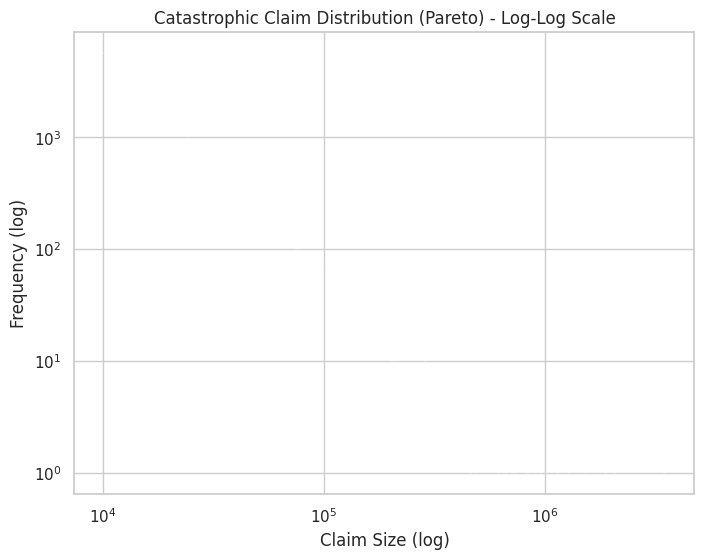

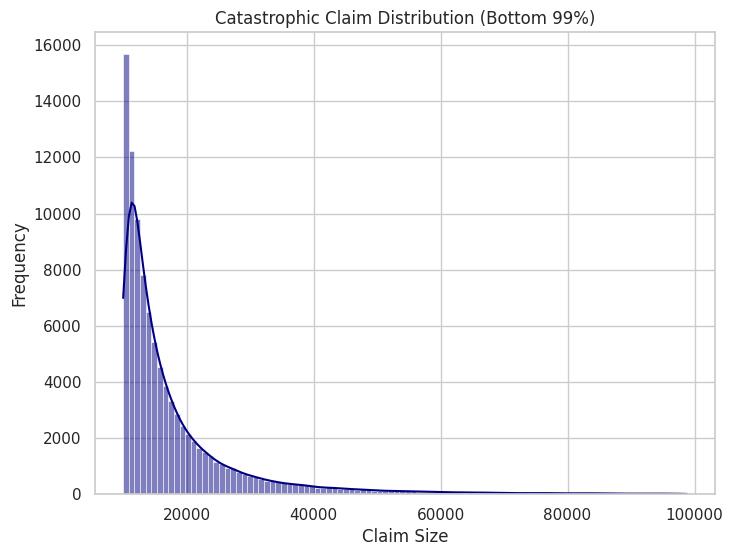

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pareto
import numpy as np

# Simulate catastrophic claims (Pareto with heavy tail)
cat_claims = pareto.rvs(2, scale=10_000, size=100_000, random_state=42)

# Option 1: Histogram with both axes log-scaled
plt.figure(figsize=(8,6))
sns.histplot(cat_claims, bins=200, log_scale=(True, True), color="crimson", edgecolor=None)
plt.title("Catastrophic Claim Distribution (Pareto) - Log-Log Scale")
plt.xlabel("Claim Size (log)")
plt.ylabel("Frequency (log)")
plt.show()

# Option 2: Focus on bulk (exclude extreme top 1%)
threshold = np.percentile(cat_claims, 99)
bulk_claims = cat_claims[cat_claims < threshold]

plt.figure(figsize=(8,6))
sns.histplot(bulk_claims, bins=100, kde=True, color="navy")
plt.title("Catastrophic Claim Distribution (Bottom 99%)")
plt.xlabel("Claim Size")
plt.ylabel("Frequency")
plt.show()

## Monte Carlo Stress Testing

Insurance solvency is not about a single "expected reserve" —
it’s about surviving **random claim volatility**, especially tail risk.

Monte Carlo steps:
1. Simulate many insurance years (random claims frequency × severity).
2. Compute annual total losses.
3. Compare against collected premiums and reserves.
4. Estimate:
   - Probability of ruin (claims > premiums + reserves).
   - Solvency margin distribution.
   - Tail Value at Risk (TVaR).

This models **risk of insolvency** under real variability, not only expectation.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pareto

np.random.seed(2025)

# --- Parameters ---
n_sims = 50_000         # Monte Carlo iterations
n_customers = 10_000    # insured persons
premium_per_customer = 600
total_premiums = n_customers * premium_per_customer

# Reserve buffer (capital margin insurer sets aside)
reserve_capital = total_premiums * 0.2   # 20% margin

# --- Claim Model ---
claim_freq = 0.2        # 20% chance of claim
alpha, xm = 2, 10_000   # Pareto(catastrophic medical severity)

total_losses = []
for _ in range(n_sims):
    freq = np.random.binomial(n_customers, claim_freq)  # number of claims
    severities = pareto.rvs(alpha, scale=xm, size=freq)
    total_losses.append(severities.sum())

total_losses = np.array(total_losses)

# --- Solvency Analysis ---
assets = total_premiums + reserve_capital
ruin_events = total_losses > assets
ruin_prob = ruin_events.mean()

solvency_margin = assets - total_losses

# 99% Tail Value at Risk (TVaR)
tvar_threshold = np.percentile(total_losses, 99)
tvar = total_losses[total_losses > tvar_threshold].mean()

print(f"Prob of Ruin: {ruin_prob*100:.2f}%")
print(f"99% TVaR (average loss beyond 99th percentile): {tvar:,.0f}")
print(f"Expected Solvency Margin: {solvency_margin.mean():,.0f}")

Prob of Ruin: 100.00%
99% TVaR (average loss beyond 99th percentile): 49,642,260
Expected Solvency Margin: -32,790,181


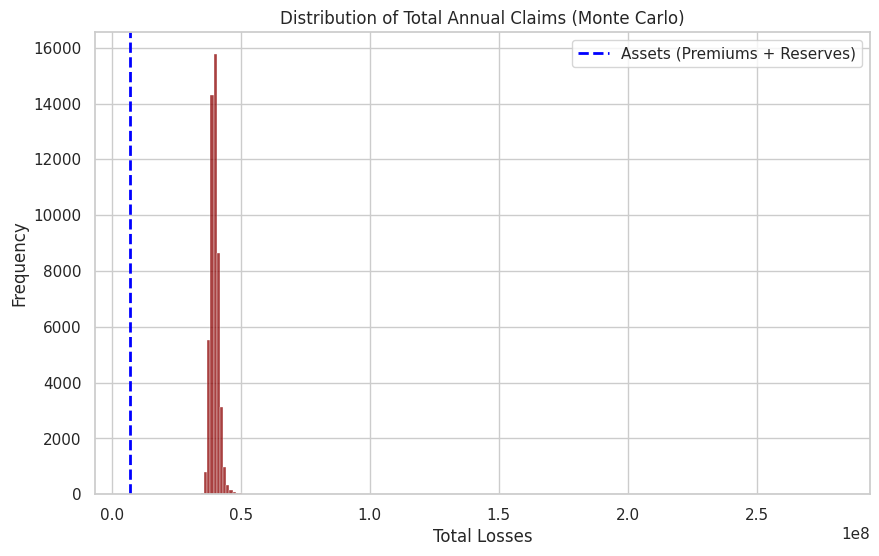

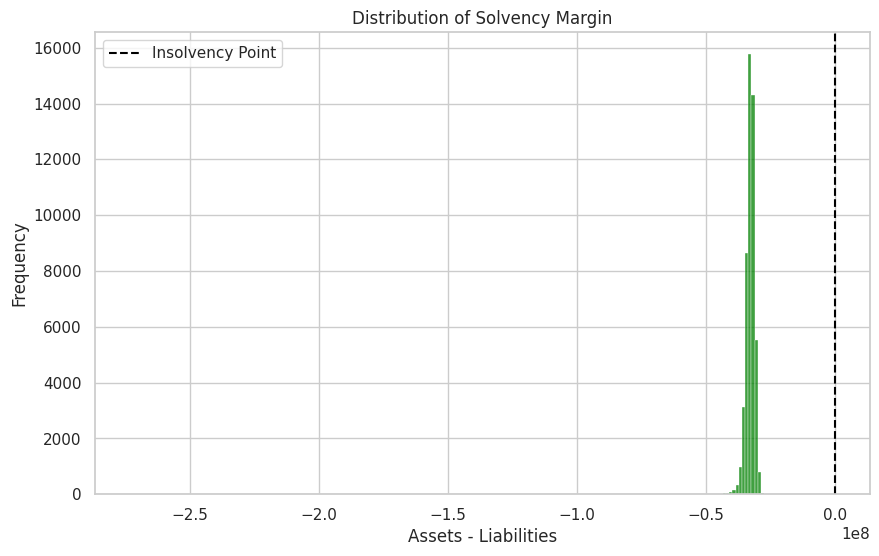

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(total_losses, bins=200, color="darkred", kde=False)
plt.axvline(assets, color="blue", linestyle="--", lw=2,
            label="Assets (Premiums + Reserves)")
plt.title("Distribution of Total Annual Claims (Monte Carlo)")
plt.xlabel("Total Losses")
plt.ylabel("Frequency")
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(solvency_margin, bins=200, color="green")
plt.axvline(0, color="black", linestyle="--", label="Insolvency Point")
plt.title("Distribution of Solvency Margin")
plt.xlabel("Assets - Liabilities")
plt.ylabel("Frequency")
plt.legend()
plt.show()

## Multi-State Health Insurance Models

Actuarial models often treat insured lives as moving between health states:

- Healthy (H)
- Sick (acute episode, cost incurred) (S)
- Chronic (C) (ongoing higher cost, lower quality of life)
- Death (D)

Transitions are probabilistic, year by year, defined by a **transition matrix**:

\[
P = \begin{bmatrix}
H→H & H→S & H→C & H→D \\
S→H & S→S & S→C & S→D \\
C→H & C→S & C→C & C→D \\
0   & 0   & 0   & 1
\end{bmatrix}
\]

Each transition has associated **expected costs**
and contributes to reserves + solvency analysis.

We simulate a portfolio of insureds across time to estimate
cost trajectories and probabilities of chronic illness/death.

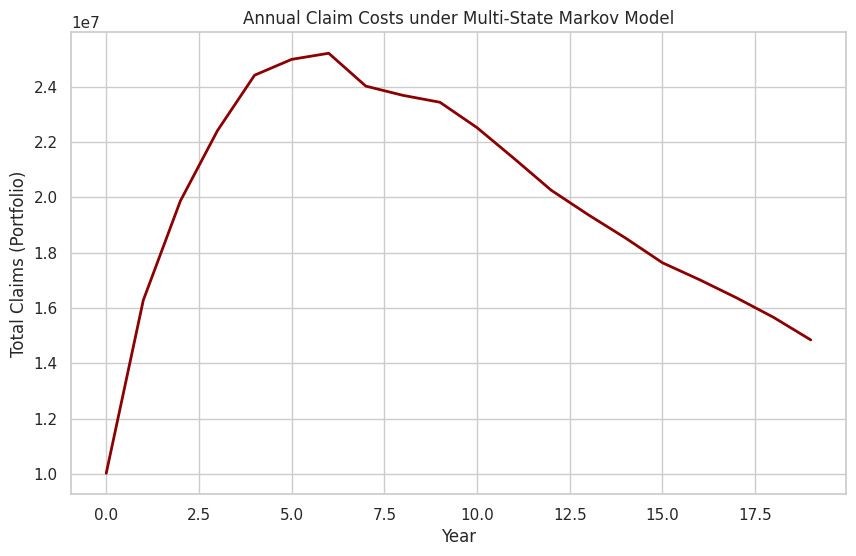

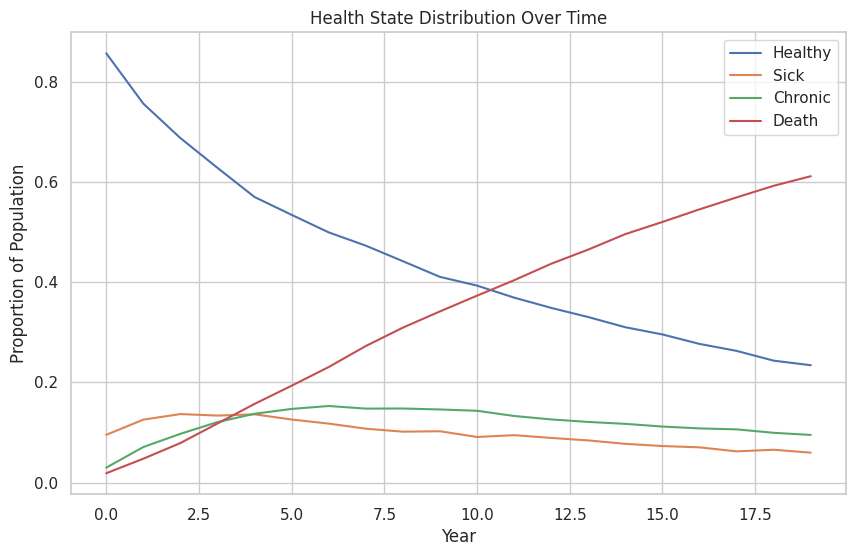

In [12]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

# --- Define Markov Transition Matrix ---
# States: 0=Healthy, 1=Sick, 2=Chronic, 3=Death
P = np.array([
    [0.85, 0.10, 0.03, 0.02],  # Healthy
    [0.30, 0.40, 0.20, 0.10],  # Sick
    [0.05, 0.10, 0.75, 0.10],  # Chronic
    [0.00, 0.00, 0.00, 1.00]   # Death
])

states = ["Healthy","Sick","Chronic","Death"]

# --- Costs associated with states ---
costs = {
    "Healthy": 200,   # annual preventive cost
    "Sick": 5000,     # treatment
    "Chronic": 12000, # ongoing management
    "Death": 0
}

# --- Simulation parameters ---
n_members = 10000
n_years = 20

# Initialize everyone Healthy
population = np.zeros(n_members, dtype=int)
history_costs = []
history_states = []

for t in range(n_years):
    new_states = []
    total_cost = 0
    for i in range(n_members):
        current = population[i]
        # draw next state according to transition row
        next_state = np.random.choice([0,1,2,3], p=P[current])
        population[i] = next_state
        total_cost += costs[states[next_state]]
        new_states.append(next_state)
    history_costs.append(total_cost)
    history_states.append(np.bincount(new_states, minlength=4))

# --- Convert to arrays ---
history_costs = np.array(history_costs)
history_states = np.array(history_states)

# --- Plot costs over time ---
plt.figure(figsize=(10,6))
plt.plot(range(n_years), history_costs, lw=2, color="darkred")
plt.xlabel("Year")
plt.ylabel("Total Claims (Portfolio)")
plt.title("Annual Claim Costs under Multi-State Markov Model")
plt.show()

# --- Plot state distributions ---
plt.figure(figsize=(10,6))
for i,state in enumerate(states):
    plt.plot(range(n_years), history_states[:,i]/n_members, label=state)
plt.xlabel("Year")
plt.ylabel("Proportion of Population")
plt.title("Health State Distribution Over Time")
plt.legend()
plt.show()

## QALY-Adjusted Markov Framework

We extend the health state Markov model by assigning:
- **Costs** (already included).
- **Utilities (QALYs)** = quality weights ∈ [0,1].

States:
- Healthy: Utility 1.0
- Sick (acute): Utility 0.7
- Chronic: Utility 0.5
- Death: Utility 0

Then yearly QALYs = Utility × Survivors.
We can calculate:
- Lifetime expected costs.
- Lifetime expected QALYs.
- Cost per QALY → policy evaluation metric.

This links actuarial solvency forecasts with economic outcomes
used in policy & HTA (Health Technology Assessment).

In [13]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2025)

# --- Transition matrix (same as before) ---
P = np.array([
    [0.85, 0.10, 0.03, 0.02],  # Healthy
    [0.30, 0.40, 0.20, 0.10],  # Sick
    [0.05, 0.10, 0.75, 0.10],  # Chronic
    [0.00, 0.00, 0.00, 1.00]
])

states = ["Healthy","Sick","Chronic","Death"]

# Costs and utilities
costs = {"Healthy":200,"Sick":5000,"Chronic":12000,"Death":0}
utilities = {"Healthy":1.0,"Sick":0.7,"Chronic":0.5,"Death":0.0}

# Simulation settings
n_members = 5000
n_years = 20

# Start population: Healthy
population = np.zeros(n_members, dtype=int)

yearly_costs = []
yearly_qalys = []
state_props = []

for t in range(n_years):
    new_states=[]
    total_cost, total_qaly = 0,0

    for i in range(n_members):
        current = population[i]
        next_state = np.random.choice([0,1,2,3], p=P[current])
        population[i]=next_state
        total_cost += costs[states[next_state]]
        total_qaly += utilities[states[next_state]]
        new_states.append(next_state)

    yearly_costs.append(total_cost)
    yearly_qalys.append(total_qaly)
    state_props.append(np.bincount(new_states, minlength=4)/n_members)

yearly_costs = np.array(yearly_costs)
yearly_qalys = np.array(yearly_qalys)
state_props = np.array(state_props)

# --- Lifetime totals ---
total_costs = yearly_costs.sum()
total_qalys = yearly_qalys.sum()

print(f"Total expected costs (20y, portfolio): {total_costs:,.0f}")
print(f"Total expected QALYs (20y, portfolio): {total_qalys:,.0f}")
print(f"Cost per QALY ≈ {total_costs/total_qalys:,.0f}")

Total expected costs (20y, portfolio): 199,102,200
Total expected QALYs (20y, portfolio): 56,406
Cost per QALY ≈ 3,530


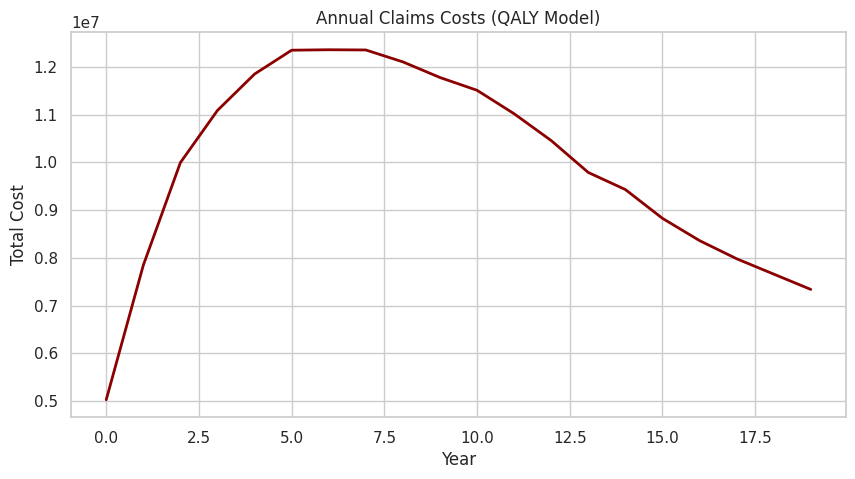

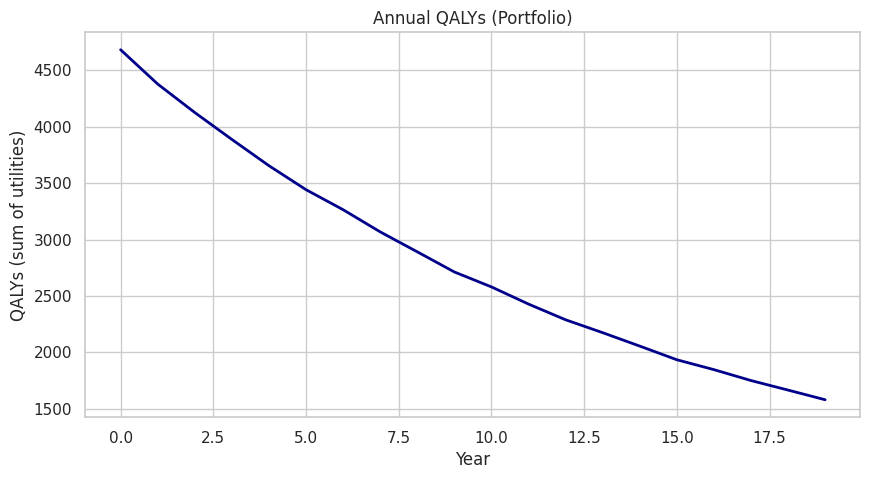

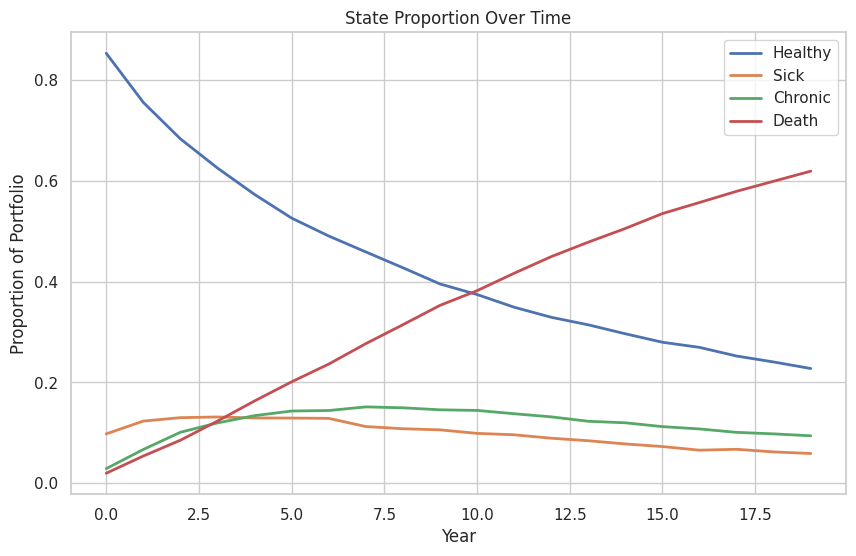

In [14]:
# Costs per year
plt.figure(figsize=(10,5))
plt.plot(range(n_years), yearly_costs, color="darkred", lw=2)
plt.title("Annual Claims Costs (QALY Model)")
plt.xlabel("Year")
plt.ylabel("Total Cost")
plt.show()

# QALYs per year
plt.figure(figsize=(10,5))
plt.plot(range(n_years), yearly_qalys, color="darkblue", lw=2)
plt.title("Annual QALYs (Portfolio)")
plt.xlabel("Year")
plt.ylabel("QALYs (sum of utilities)")
plt.show()

# State proportions
plt.figure(figsize=(10,6))
for i,s in enumerate(states):
    plt.plot(range(n_years), state_props[:,i], lw=2, label=s)
plt.legend()
plt.title("State Proportion Over Time")
plt.xlabel("Year")
plt.ylabel("Proportion of Portfolio")
plt.show()

## Probabilistic Sensitivity Analysis (PSA)

Point estimates are not enough — every parameter in actuarial /
health economics models is uncertain.

- Transition probabilities may vary due to epidemiology.
- Costs have volatility (Gamma distribution).
- Utilities/QALYs uncertain (Beta distribution).

**PSA** = repeatedly sample parameter sets and run the Markov simulation.
We then estimate distributions of:
- Total costs
- Total QALYs
- Incremental cost-effectiveness ratios (ICERs)

Finally, we produce a **CEAC** (Cost-Effectiveness Acceptability Curve):
- Probability that intervention is cost-effective at a willingness-to-pay (WTP) threshold.